In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

1. How can you determine an integral using Newton-Cotes or Monte Carlo when the domain is infinite? Suggest change of variables to map,

    a. $[-\infty, \infty] \rightarrow [-1,1]$  
    b. $[0, \infty] \rightarrow [0,1]$  
    c. $[0, \infty] \rightarrow [-1,1]$

### a. Let u = $\frac{2}{\pi}\arctan(x)$ => x = $\tan\left(\frac{\pi u}{2}\right)$  
Need $\frac{\pi}{2}$ to scale properly between [-1,1]

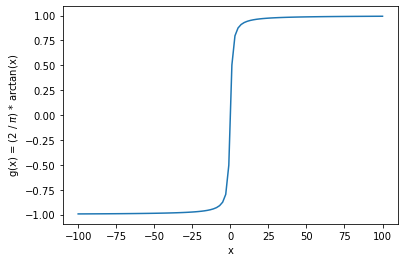

u(-inf) = -1.0
u(inf) =  1.0


In [120]:
x1 = np.linspace(-1e2, 1e2, 100)
gx1 = (2 / np.pi) * np.arctan(x1)
plt.plot(x1,gx1)
plt.ylabel("g(x) = (2 / $\pi$) * arctan(x)")
plt.xlabel("x")
plt.show()

gx1_a = (2 / np.pi) * np.arctan(-np.inf)
gx1_b = (2 / np.pi) * np.arctan(np.inf)
print("u(-inf) =", gx1_a)
print("u(inf) = ", gx1_b)

### b. Let u = $e^{-x}$ => x = $-\log(u)$

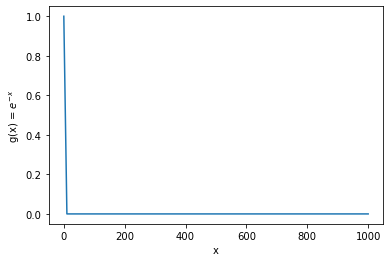

u(0) = 1.0
u(inf) = 0.0


In [119]:
x2 = np.linspace(0, 1e3, 100)
gx2 = np.exp(-x2)
plt.plot(x2, gx2)
plt.xlabel("x")
plt.ylabel("g(x) = $e^{-x}$")
plt.show()

gx2_a = np.exp(-0)
gx2_b = np.exp(-np.inf)
print("u(0) =", gx2_a)
print("u(inf) =", gx2_b)

### c. Use a linear transformation on the change of variables from (b.):  
    $y = mu + b$  
    $y(0) = -1 = m(0) + b \rightarrow b = -1$  
    $y(1) = 1 = m(1) - 1 \rightarrow m = 2$  
    $y = 2u - 1 \rightarrow y = 2e^{-x} - 1$
    

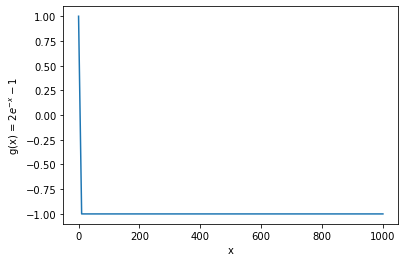

y(0) = 1.0
y(inf) = -1.0


In [123]:
x3 = np.linspace(0, 1e3, 100)
gx3 = 2*np.exp(-x3) - 1
plt.plot(x3, gx3)
plt.xlabel("x")
plt.ylabel("g(x) = $2e^{-x} - 1$")
plt.show()

gx3_a = 2*np.exp(-0) - 1
gx3_b = 2*np.exp(-np.inf) - 1
print("y(0) =", gx3_a)
print("y(inf) =", gx3_b)

# Question 2: Direct MC in High Dimensions

## <center> $\frac{V_S}{V_C}$ = $\frac{\pi^{n/2}}{2^{n}\Gamma(\frac{n}{2}+1)}$ </center>

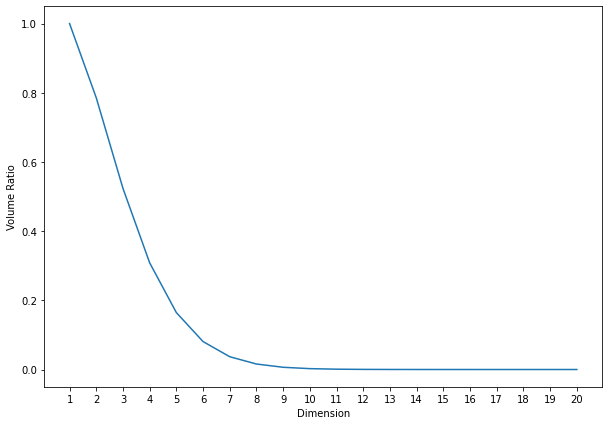

In [140]:
from scipy.special import gamma
dims = np.arange(1,21)
ratio = (np.pi**(dims/2)) / ((2**dims)*gamma((dims/2)+1))

plt.figure(figsize=(10,7))
plt.plot(dims, ratio)
plt.xticks(dims)
plt.xlabel('Dimension')
plt.ylabel('Volume Ratio')
plt.show()

# Question 3: Basic Integration

In [376]:
def averageConeVolume(H, a1, b1, a2, b2, npts):
    x1 = np.random.uniform(a1, b1, size=npts)
    x2 = np.random.uniform(a2, b2, size=npts)
    cond = np.where(x1**2 + x2**2 <= 1, H * (1-np.sqrt(x1**2 + x2**2)), 0)
    return np.mean(cond)

In [377]:
H = 2
trials = 1000
npts = 1000
print("Single-Trial Monte Carlo Volume Estimate:", 4*averageConeVolume(H, -1, 1, -1, 1, npts))
print(str(trials)+"-Trial Monte Carlo Mean Volume Estimate", np.mean([4*averageConeVolume(H, -1, 1, -1, 1, 1000) for i in range(100)]))
print('True Volume:', np.pi*H/3)

Single-Trial Monte Carlo Volume Estimate: 2.0873628482363547
1000-Trial Monte Carlo Mean Volume Estimate 2.092436209833027
True Volume: 2.0943951023931953
